<a href="https://colab.research.google.com/github/Adasyam31494/Generative-AI-with-Large-Language-Models/blob/main/ProGAN_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install tensorflow matplotlib

In [9]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(4*4*256, use_bias=False, input_shape=(100,)))
    model.add(layers.Reshape((4, 4, 256)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(128, (3, 3), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(3, (3, 3), strides=(1, 1), padding='same', use_bias=False, activation='tanh'))
    return model

In [11]:
generator = make_generator_model()
noise = tf.random.normal([16, 100])
images = generator(noise, training=False)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


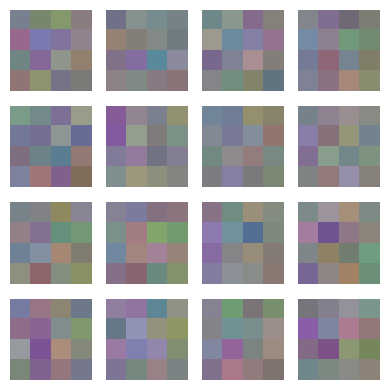

In [13]:
def show_images(images, n=4):
    images = (images + 1) / 2.0
    fig, axs = plt.subplots(n, n, figsize=(4, 4))
    for i in range(n):
        for j in range(n):
            axs[i, j].imshow(images[i * n + j])
            axs[i, j].axis('off')
    plt.tight_layout()
    plt.show()

show_images(images)